**6. zadatak - Obične diferencijalne jednadžbe (LV6)**

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
def f(t,y):
  return -2*y + np.exp(-t)

x0=0
y0=1
h1 = 0.5
h2=0.25
h3=0.125
xmax=0.8

def y_exact(t):
  return np.exp(-t) + C*np.exp(-(2*t))

C=0

1. Riješite problem numerički:

• Eulerovom metodom,

• Runge–Kutta metodom 4. reda.

2. Rješenje izračunajte za različite korake h.


Euler

In [44]:
# Eulerova metoda
def euler(f, x0, y0, h, xmax):
    xs = [x0]
    ys = [y0]

    x = x0
    y = y0

    while x < xmax:
        y = y + h * f(x, y)      # Eulerova iteracija
        x = x + h
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

xe1,ye1 = euler(f, x0, y0, h1, xmax)
xe2,ye2 = euler(f, x0, y0, h2, xmax)
xe3,ye3 = euler(f, x0, y0, h3, xmax)

# Usporedba s točnim rješenjem
x_plot = np.linspace(0, xmax, 200)
y_plot = y_exact(x_plot)

print("za h=1")
print(" x\t Euler\t    Točno\t Pogreška")
for i in range(len(xe1)):
    print(f"{xe1[i]:.2f}\t {ye1[i]:.6f}\t {y_exact(xe1[i]):.6f}\t {abs(ye1[i]-y_exact(xe1[i])):.6f}")
print("\nza h=0.5")
print("x\t Euler\t    Točno\t Pogreška")
for i in range(len(xe2)):
    print(f"{xe2[i]:.2f}\t {ye2[i]:.6f}\t {y_exact(xe2[i]):.6f}\t {abs(ye2[i]-y_exact(xe2[i])):.6f}")
print("\nza h=0.25")
print("x\t Euler\t    Točno\t Pogreška")
for i in range(len(xe3)):
    print(f"{xe3[i]:.2f}\t {ye3[i]:.6f}\t {y_exact(xe3[i]):.6f}\t {abs(ye3[i]-y_exact(xe3[i])):.6f}")


za h=1
 x	 Euler	    Točno	 Pogreška
0.00	 1.000000	 1.000000	 0.000000
0.50	 0.500000	 0.606531	 0.106531
1.00	 0.303265	 0.367879	 0.064614

za h=0.5
x	 Euler	    Točno	 Pogreška
0.00	 1.000000	 1.000000	 0.000000
0.25	 0.750000	 0.778801	 0.028801
0.50	 0.569700	 0.606531	 0.036830
0.75	 0.436483	 0.472367	 0.035884
1.00	 0.336333	 0.367879	 0.031546

za h=0.25
x	 Euler	    Točno	 Pogreška
0.00	 1.000000	 1.000000	 0.000000
0.12	 0.875000	 0.882497	 0.007497
0.25	 0.766562	 0.778801	 0.012239
0.38	 0.672272	 0.687289	 0.015018
0.50	 0.590115	 0.606531	 0.016416
0.62	 0.518403	 0.535261	 0.016859
0.75	 0.455710	 0.472367	 0.016657
0.88	 0.400828	 0.416862	 0.016034


Runge Kutta

In [45]:
# RK4 metoda
def rk4(f, x0, y0, h, xmax):
    xs = [x0]
    ys = [y0]
    x, y = x0, y0

    while x < xmax:
        k1 = f(x, y)
        k2 = f(x + h/2, y + h*k1/2)
        k3 = f(x + h/2, y + h*k2/2)
        k4 = f(x + h,   y + h*k3)

        y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        x = x + h

        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

xrk1, yrk1 = rk4(f, x0, y0, h1, xmax)
xrk2, yrk2 = rk4(f, x0, y0, h2, xmax)
xrk3, yrk3 = rk4(f, x0, y0, h3, xmax)

# Usporedba s točnim rješenjem
x_plot = np.linspace(0, xmax, 200)
y_plot = y_exact(x_plot)

print("\nza h=1")
print(" x\t RK\t    Točno\t Pogreška")
for i in range(len(xe1)):
    print(f"{xrk1[i]:.2f}\t {yrk1[i]:.6f}\t {y_exact(xrk1[i]):.6f}\t {abs(yrk1[i]-y_exact(xrk1[i])):.6f}")
print("\nza h=0.5")
print("x\t RK\t    Točno\t Pogreška")
for i in range(len(xe2)):
    print(f"{xrk2[i]:.2f}\t {yrk2[i]:.6f}\t {y_exact(xrk2[i]):.6f}\t {abs(yrk2[i]-y_exact(xrk2[i])):.6f}")
print("\nza h=0.25")
print("x\t RK\t    Točno\t Pogreška")
for i in range(len(xe3)):
    print(f"{xrk3[i]:.2f}\t {yrk3[i]:.6f}\t {y_exact(xrk3[i]):.6f}\t {abs(yrk3[i]-y_exact(xrk3[i])):.6f}")



za h=1
 x	 RK	    Točno	 Pogreška
0.00	 1.000000	 1.000000	 0.000000
0.50	 0.608628	 0.606531	 0.002097
1.00	 0.369938	 0.367879	 0.002058

za h=0.5
x	 RK	    Točno	 Pogreška
0.00	 1.000000	 1.000000	 0.000000
0.25	 0.778869	 0.778801	 0.000068
0.50	 0.606625	 0.606531	 0.000094
0.75	 0.472465	 0.472367	 0.000099
1.00	 0.367971	 0.367879	 0.000092

za h=0.25
x	 RK	    Točno	 Pogreška
0.00	 1.000000	 1.000000	 0.000000
0.12	 0.882499	 0.882497	 0.000002
0.25	 0.778804	 0.778801	 0.000004
0.38	 0.687294	 0.687289	 0.000004
0.50	 0.606536	 0.606531	 0.000005
0.62	 0.535267	 0.535261	 0.000005
0.75	 0.472372	 0.472367	 0.000005
0.88	 0.416867	 0.416862	 0.000005


3. Grafički usporedite numerička rješenja.

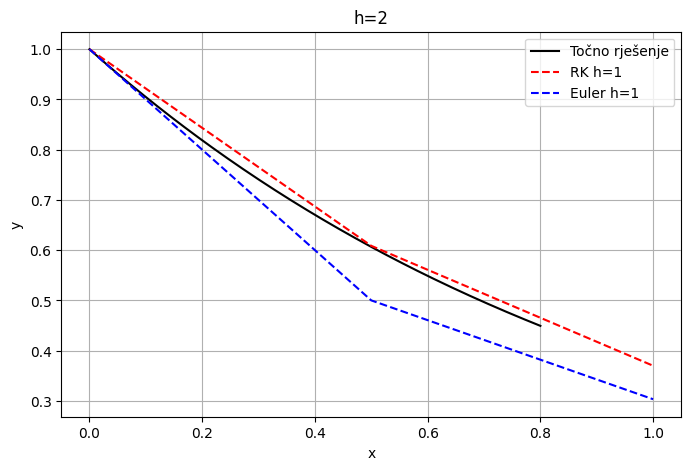

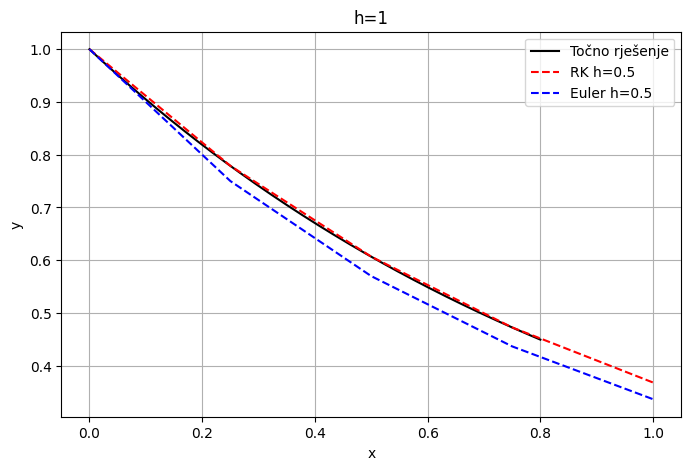

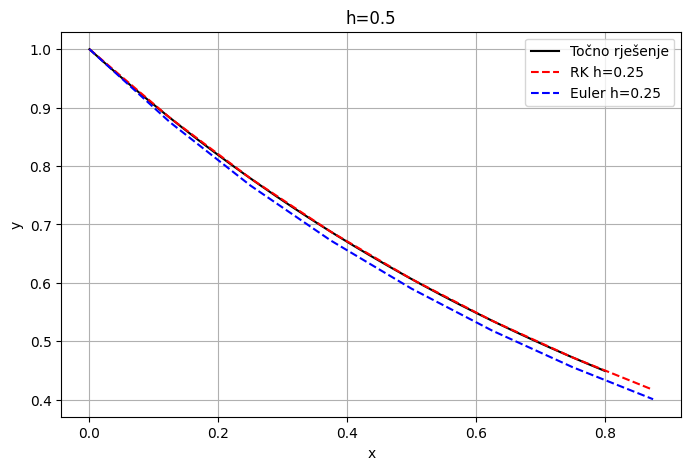

In [46]:
# Graf
plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot, 'k-', label='Točno rješenje')
plt.plot(xrk1, yrk1, 'r--', label='RK h=1')
plt.plot(xe1, ye1, 'b--', label='Euler h=1')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.title("h=2")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot, 'k-', label='Točno rješenje')
plt.plot(xrk2, yrk2, 'r--', label='RK h=0.5')
plt.plot(xe2, ye2, 'b--', label='Euler h=0.5')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.title("h=1")
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot, 'k-', label='Točno rješenje')
plt.plot(xrk3, yrk3, 'r--', label='RK h=0.25')
plt.plot(xe3, ye3, 'b--', label='Euler h=0.25')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.title("h=0.5")
plt.show()